In [1]:
import numpy as np
from matplotlib import pyplot as plt
import theano
from theano import tensor as T

from FeedForwardNetwork import FeedForwardNetwork
from utils import arbitrary_polynomial

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import matplotlib as mpl
from twodFFNN import FeedForwardNetwork as two_d_network

import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

mpl.rcParams['figure.figsize'] = (18,16)

In [2]:
PARAMS = [10.0, 0, -1.0, 5.0]
x_values = np.arange(-1, 1, 0.05)
data_true = arbitrary_polynomial(x_values, PARAMS)

np.random.seed(123)
data_sampled = np.random.normal(loc=data_true, scale=0.05)

In [3]:
model = two_d_network(n_hidden_units=1, seed=4, rand=False, W1_in=2.0, W2_in=2.0)

n_iterations = 10**4

model.learn(x_values, data_sampled, n_iters=n_iterations, learn_rate=.001, save_to_path='./try/two_d/')

Started.
At iteration 1000, cost = 0.362520, Total run time = 0.00 mins
At iteration 2000, cost = 0.265259, Total run time = 0.01 mins
At iteration 3000, cost = 0.162458, Total run time = 0.01 mins
At iteration 4000, cost = 0.124765, Total run time = 0.02 mins
At iteration 5000, cost = 0.117968, Total run time = 0.02 mins
At iteration 6000, cost = 0.116957, Total run time = 0.03 mins
At iteration 7000, cost = 0.116812, Total run time = 0.03 mins
At iteration 8000, cost = 0.116791, Total run time = 0.03 mins
At iteration 9000, cost = 0.116788, Total run time = 0.04 mins
At iteration 9999, cost = 0.116787, Total run time = 0.04 mins
Saving...
Saved.


In [4]:
model.cost_array

[array(0.4177210680934335),
 array(0.3625200838128257),
 array(0.26525864959642226),
 array(0.1624577674944445),
 array(0.12476510134775716),
 array(0.11796815187463223),
 array(0.11695678497469261),
 array(0.11681173884994174),
 array(0.1167909415096821),
 array(0.11678780592791652),
 array(0.11678717759984872)]

In [5]:
def cost_function_2d(W1, W2, non_lin = np.tanh, y_true = data_sampled, x=x_values):
    h = non_lin(np.einsum('ij,A->ijA',W1,x))
    ident = np.eye(len(W1))
    pred = non_lin(np.einsum('ij, klA, ik, jl->ijA',W2,h, ident, ident))
    err = pred - y_true
    cost = np.einsum('ijA,ijA -> ij', err, err)/(2*x.shape[0])
    return cost

In [6]:
def plot_cost_surface(W1_range, W2_range, model):
    """plots cost surface and trajectory of learning"""
    W1, W2 = np.meshgrid(W1_range, W2_range)
    cost = cost_function_2d(W1, W2)

    trace1 = go.Surface(
            z = cost,
            x = W1[0,:],
            y = W2[:,0]
        )

    W1_tried = np.array(model.W1_array)
    W2_tried = np.array(model.W2_array)

    trace2 = go.Scatter3d(
        x=W1_tried,
        y=W2_tried,
        z = np.array(model.cost_array),
        mode='markers+lines',
        name='steepest',
        line=dict(
            color='black'
        )
    )

    layout = go.Layout(
        title='Cost'
    )

    data = [trace1, trace2]
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig, filename='contour-scatter')

In [8]:
plot_cost_surface(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5), model)

In [7]:
model.W1_array

[array(2.0),
 array(1.9879666188861964),
 array(1.189983236931913),
 array(1.1136442894033118),
 array(1.0402928065218096),
 array(0.970292587214872),
 array(0.9039242577008061),
 array(0.8413832458529344),
 array(0.7827850921972214),
 array(0.7281759969167138),
 array(0.6775459343956076),
 array(0.6308864626684356)]

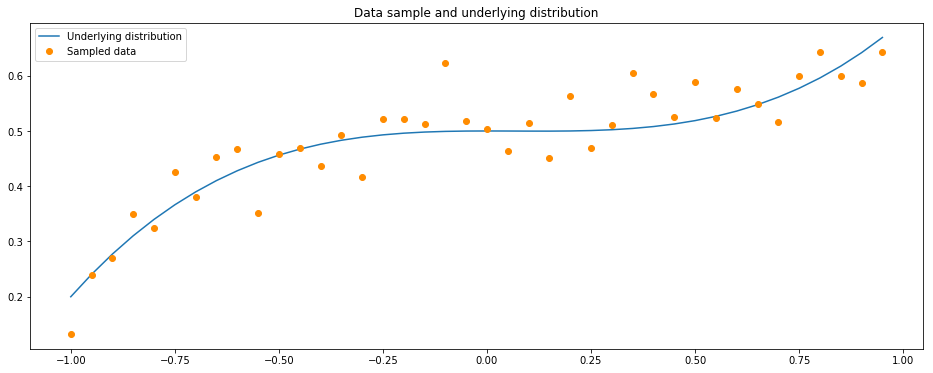

In [22]:
PARAMS = [10.0, 0, -1.0, 5.0]
x_values = np.arange(-1, 1, 0.05)

data_true = arbitrary_polynomial(x_values, PARAMS)
data_sampled = np.random.normal(loc=data_true, scale=0.05)

plt.figure(figsize=(16,6))
plt.plot(x_values, data_true, label='Underlying distribution')
plt.plot(x_values, data_sampled, 'o', color='darkorange', label='Sampled data')
plt.title("Data sample and underlying distribution")
plt.legend()
plt.show()

In [21]:
def Tanh(x):
    return np.tanh(x)

In [23]:
def cost_function_2d(W1, W2, non_lin = Tanh, y_true = data_sampled, x=x_values):
    h = non_lin(np.einsum('ij,A->ijA',W1,x))
    ident = np.eye(len(W1))
    pred = non_lin(np.einsum('ij, klA, ik, jl->ijA',W2,h, ident, ident))
    err = pred - y_true
    cost = np.einsum('ijA,ijA -> ij', err, err)/(2*x.shape[0])
    return cost

In [27]:
model = two_d_network(n_hidden_units=1, seed=4, rand=False, W1_in=2.0, W2_in=2.0)

n_iterations = 10**4

model.learn(x_values, data_sampled, n_iters=n_iterations, learn_rate=10.0, save_to_path='./try/two_d/')

Started.
At iteration 1000, cost = 0.121062, Total run time = 0.00 mins
At iteration 2000, cost = 0.120644, Total run time = 0.01 mins
At iteration 3000, cost = 0.120644, Total run time = 0.01 mins
At iteration 4000, cost = 0.120644, Total run time = 0.02 mins
At iteration 5000, cost = 0.120644, Total run time = 0.02 mins
At iteration 6000, cost = 0.120644, Total run time = 0.03 mins
At iteration 7000, cost = 0.120644, Total run time = 0.03 mins
At iteration 8000, cost = 0.120644, Total run time = 0.04 mins
At iteration 9000, cost = 0.120644, Total run time = 0.04 mins
At iteration 9999, cost = 0.120524, Total run time = 0.05 mins
Saving...
Saved.


In [34]:
W1 = np.arange(-5, 5, 0.5)
W2 = np.arange(-5, 5, 0.5)
W1, W2 = np.meshgrid(W1, W2)
Z = cost_function_2d(W1, W2)

trace1 = go.Surface(
        z = Z,
        x = W1[0,:],
        y = W2[:,0]
    )

# data = [trace1]
# py.iplot(data)


W1_tried = np.array(model.W1_array)
W2_tried = np.array(model.W2_array)

trace2 = go.Scatter3d(
    x=W1_tried,
    y=W2_tried,
    z = np.array(model.cost_array),
    mode='markers+lines',
    name='steepest',
    line=dict(
        color='black'
    )
)

layout = go.Layout(
    title='cost',
    autosize=False,
    width=800,
    height=800,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='contour-scatter')

#


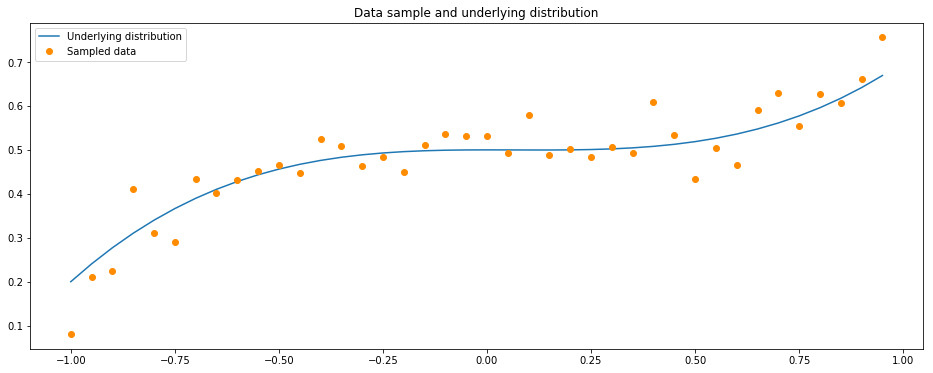

In [30]:
PARAMS = [10.0, 0, -1.0, 5.0]
x_values = np.arange(-1, 1, 0.05)

data_true = arbitrary_polynomial(x_values, PARAMS)
data_sampled = np.random.normal(loc=data_true, scale=0.05)

plt.figure(figsize=(16,6))
plt.plot(x_values, data_true, label='Underlying distribution')
plt.plot(x_values, data_sampled, 'o', color='darkorange', label='Sampled data')
plt.title("Data sample and underlying distribution")
plt.legend()
plt.show()

In [31]:
model = two_d_network(n_hidden_units=1, seed=4, rand=False, W1_in=2.0, W2_in=2.0)

n_iterations = 10**4

model.learn(x_values, data_sampled, n_iters=n_iterations, learn_rate=10.0, save_to_path='./try/two_d/')

Started.
At iteration 1000, cost = 0.120450, Total run time = 0.00 mins
At iteration 2000, cost = 0.120037, Total run time = 0.01 mins
At iteration 3000, cost = 0.120036, Total run time = 0.01 mins
At iteration 4000, cost = 0.120037, Total run time = 0.02 mins
At iteration 5000, cost = 0.120036, Total run time = 0.02 mins
At iteration 6000, cost = 0.120036, Total run time = 0.03 mins
At iteration 7000, cost = 0.120037, Total run time = 0.03 mins
At iteration 8000, cost = 0.120036, Total run time = 0.04 mins
At iteration 9000, cost = 0.120037, Total run time = 0.04 mins
At iteration 9999, cost = 0.119916, Total run time = 0.05 mins
Saving...
Saved.


In [32]:
W1 = np.arange(-1, 1, 0.05)
W2 = np.arange(-1, 1, 0.05)
W1, W2 = np.meshgrid(W1, W2)
Z = cost_function_2d(W1, W2)

trace1 = go.Surface(
        z = Z,
        x = W1[0,:],
        y = W2[:,0]
    )

# data = [trace1]
# py.iplot(data)


W1_tried = np.array(model.W1_array)
W2_tried = np.array(model.W2_array)

trace2 = go.Scatter3d(
    x=W1_tried,
    y=W2_tried,
    z = np.array(model.cost_array),
    mode='markers+lines',
    name='steepest',
    line=dict(
        color='black'
    )
)

layout = go.Layout(
    title='cost',
    autosize=False,
    width=800,
    height=800,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='contour-scatter')

#


# Higher Dim stuff

In [3]:
model = FeedForwardNetwork(n_hidden_units=1)

n_iterations = 10**3

model.learn(x_values, data_sampled, n_iters=n_iterations, learn_rate=2.0, save_to_path='./try/')

# model.plot_cost()

# model.plot_prediction(x_values, data_sampled, PARAMS)

Started.
At iteration 100, cost = 0.012309, Total run time = 0.00 mins
At iteration 200, cost = 0.001943, Total run time = 0.00 mins
At iteration 300, cost = 0.001854, Total run time = 0.00 mins
At iteration 400, cost = 0.001780, Total run time = 0.00 mins
At iteration 500, cost = 0.001725, Total run time = 0.00 mins
At iteration 600, cost = 0.001691, Total run time = 0.00 mins
At iteration 700, cost = 0.001670, Total run time = 0.00 mins
At iteration 800, cost = 0.001658, Total run time = 0.01 mins
At iteration 900, cost = 0.001650, Total run time = 0.01 mins
At iteration 999, cost = 0.001629, Total run time = 0.01 mins
Saving...
Saved.


In [4]:
model.restore_parameters_and_cost( learn_rate=2.0, iters_millions=n_iterations*10**-6, method='GD', path='./try/')

In [5]:
w1_0_vals = [wval[0] for wval in model.W1_array]

In [6]:
c = [cval for cval in model.cost_array]

In [12]:
def cost_function(W1, b1, W2, b2, non_lin = Tanh, y_true = data_sampled, x=x_values):
    h = non_lin(np.outer(W1,x) + b1)
    
    pred = non_lin(np.dot(W2,h) + b2)

    return np.dot( pred - y_true, pred - y_true )/ (2 * x.shape[0])

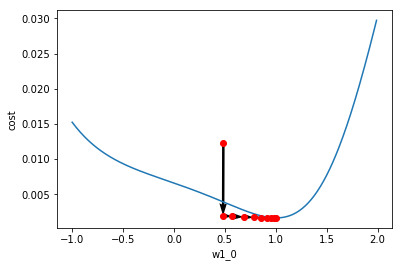

In [9]:
w1_0_vals = [wval[0] for wval in model.W1_array]
c = [cval for cval in model.cost_array]
plt.figure()
w1s = model.W1_array[-1][1:]
# x_range = np.arange(np.min(w1_0_vals),np.max(w1_0_vals),0.01)
x_range = np.arange(-1,2,0.01)

J = [cost_function(np.insert(w1s, 0, w),
                   model.b1_array[-1],
                   model.W2_array[-1],
                   model.b2_array[-1]) 
     for w in x_range]
plt.plot(x_range, J)

x = np.array(w1_0_vals)
y = np.array(c)
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
plt.plot(x,y, 'o', color='red')
plt.xlabel('w1_0')
plt.ylabel('cost')

plt.show()

### systematic

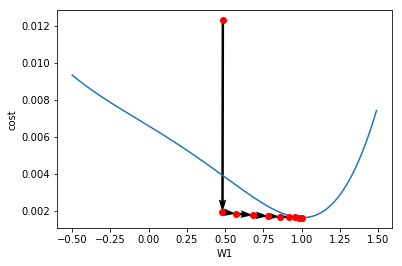

In [10]:
param = model.W1_array
vals = [val for val in param]
c = [cval for cval in model.cost_array]
plt.figure()
w1s = param[-1][1:]
x_range = np.arange(np.min(vals),np.max(vals),0.01)
x_range = np.arange(-0.5,1.5,0.01)

J = [cost_function(np.insert(w1s, 0, w),
                   model.b1_array[-1],
                   model.W2_array[-1],
                   model.b2_array[-1]) 
     for w in x_range]
plt.plot(x_range, J)

x = np.array(vals)
y = np.array(c)
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
plt.plot(x,y, 'o', color='red')
plt.xlabel("W1")
plt.ylabel('cost')

plt.show()

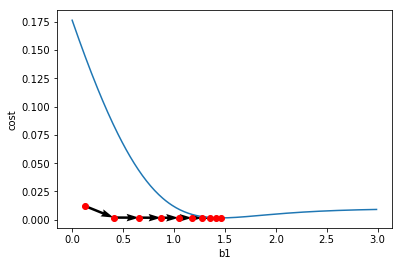

In [11]:
param = model.b1_array
vals = [val[0][0] for val in param]
c = [cval for cval in model.cost_array]
plt.figure()
w1s = param[-1][1:]
x_range = np.arange(np.min(vals),np.max(vals),0.01)
x_range = np.arange(0,3,0.01)

J = [cost_function(model.W1_array[-1],
                   np.insert(w1s, 0, w),
                   model.W2_array[-1],
                   model.b2_array[-1]) 
     for w in x_range]
plt.plot(x_range, J)

x = np.array(vals)

y = np.array(c)
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
plt.plot(x,y, 'o', color='red')
plt.xlabel("b1")
plt.ylabel('cost')

plt.show()

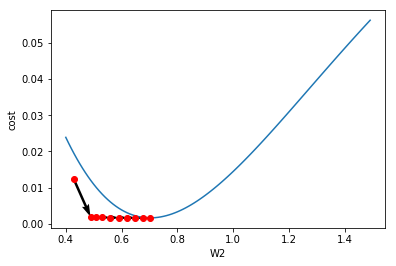

In [12]:
param = model.W2_array
vals = [val for val in param]
c = [cval for cval in model.cost_array]
plt.figure()
w1s = param[-1][1:]
x_range = np.arange(np.min(vals),np.max(vals),0.01)
x_range = np.arange(0.4,1.5,0.01)

J = [cost_function(model.W1_array[-1],
                   model.b1_array[-1],
                   np.insert(w1s, 0, w),
                   model.b2_array[-1]) 
     for w in x_range]
plt.plot(x_range, J)

x = np.array(vals)
y = np.array(c)
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
plt.plot(x,y, 'o', color='red')
plt.xlabel("W2")
plt.ylabel('cost')

plt.show()

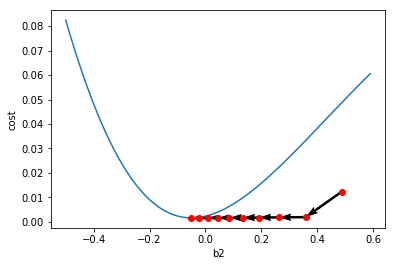

In [13]:
param = model.b2_array
vals = [val for val in param]
c = [cval for cval in model.cost_array]
plt.figure()
w1s = param[-1][1:]
x_range = np.arange(np.min(vals),np.max(vals),0.01)
x_range = np.arange(-0.5,0.6,0.01)

J = [cost_function(model.W1_array[-1],
                   model.b1_array[-1],
                   model.W2_array[-1],
                   np.insert(w1s, 0, w) )
     for w in x_range]
plt.plot(x_range, J)

x = np.array(vals)

y = np.array(c)
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
plt.plot(x,y, 'o', color='red')
plt.xlabel("b2")
plt.ylabel('cost')

plt.show()

### Subplots

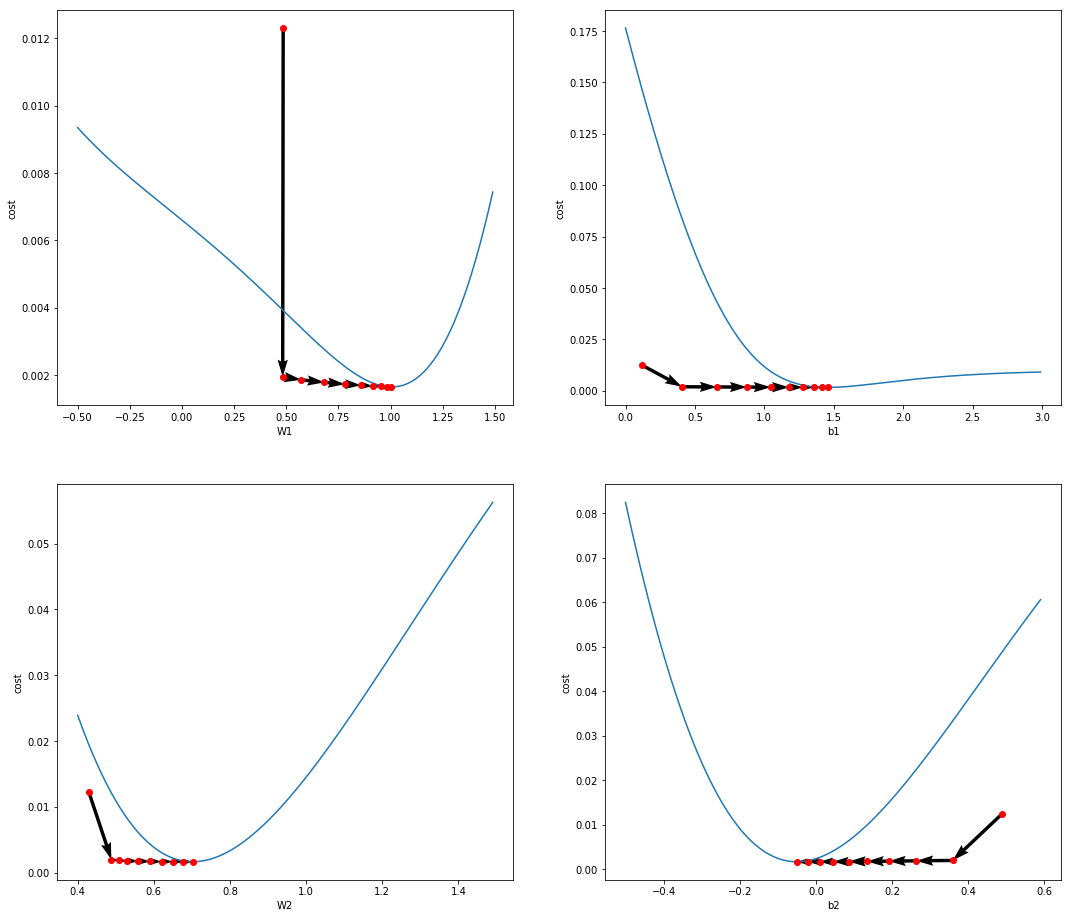

In [14]:
mpl.rcParams['figure.figsize'] = (18,16)

# row and column sharing

# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# W1
param = model.W1_array
vals = [val for val in param]
c = [cval for cval in model.cost_array]
plt.figure()
w1s = param[-1][1:]
x_range = np.arange(np.min(vals),np.max(vals),0.01)
x_range = np.arange(-0.5,1.5,0.01)

J = [cost_function(np.insert(w1s, 0, w),
                   model.b1_array[-1],
                   model.W2_array[-1],
                   model.b2_array[-1]) 
     for w in x_range]
ax1.plot(x_range, J)

u = np.array(vals)
v = np.array(c)
ax1.quiver(u[:-1], v[:-1], u[1:]-u[:-1], v[1:]-v[:-1], scale_units='xy', angles='xy', scale=1)
ax1.plot(u,v, 'o', color='red')
ax1.set_xlabel("W1")
ax1.set_ylabel('cost')
# ax1.set_title('W1')

# b1
param = model.b1_array
vals = [val[0][0] for val in param]
c = [cval for cval in model.cost_array]
plt.figure()
w1s = param[-1][1:]
x_range = np.arange(np.min(vals),np.max(vals),0.01)
x_range = np.arange(0,3,0.01)

J = [cost_function(model.W1_array[-1],
                   np.insert(w1s, 0, w),
                   model.W2_array[-1],
                   model.b2_array[-1]) 
     for w in x_range]
ax2.plot(x_range, J)

x = np.array(vals)

y = np.array(c)
ax2.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
ax2.plot(x,y, 'o', color='red')
# ax2.set_title('b1')
ax2.set_xlabel("b1")
ax2.set_ylabel('cost')

# W2
param = model.W2_array
vals = [val for val in param]
c = [cval for cval in model.cost_array]
plt.figure()
w1s = param[-1][1:]
x_range = np.arange(np.min(vals),np.max(vals),0.01)
x_range = np.arange(0.4,1.5,0.01)

J = [cost_function(model.W1_array[-1],
                   model.b1_array[-1],
                   np.insert(w1s, 0, w),
                   model.b2_array[-1]) 
     for w in x_range]
ax3.plot(x_range, J)

x = np.array(vals)
y = np.array(c)
ax3.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
ax3.plot(x,y, 'o', color='red')
# ax3.set_title('W2')
ax3.set_xlabel("W2")
ax3.set_ylabel('cost')

# b2
param = model.b2_array
vals = [val for val in param]
c = [cval for cval in model.cost_array]
plt.figure()
w1s = param[-1][1:]
x_range = np.arange(np.min(vals),np.max(vals),0.01)
x_range = np.arange(-0.5,0.6,0.01)

J = [cost_function(model.W1_array[-1],
                   model.b1_array[-1],
                   model.W2_array[-1],
                   np.insert(w1s, 0, w) )
     for w in x_range]
ax4.plot(x_range, J)

x = np.array(vals)

y = np.array(c)
ax4.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
ax4.plot(x,y, 'o', color='red')
# ax4.set_title("b2")
ax4.set_xlabel("b2")
ax4.set_ylabel('cost')

# f.subplots_adjust(hspace=0.6, wspace=0.2)

plt.show()



# x = np.linspace(0, 2 * np.pi, 400)
# y = np.sin(x ** 2)

# ax1.plot(x, y)

# ax2.scatter(x, y)
# ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')


Above is 1-hidden unit, single layer FFNN, with biases, all parameters.

# Without biases to get 2D model

# NEED TO ALTER FFNN_class TO GET RID OF BIAS VECTORS SO THAT GRADIENT DESCENT CAN BE PLOTTED ONTO THE COST SURFACE

In [33]:
x_values.shape[0]

40

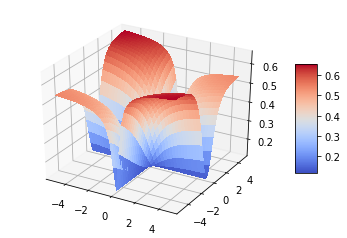

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')

W1 = np.arange(-5, 5, 0.25)
W2 = np.arange(-5, 5, 0.25)
W1, W2 = np.meshgrid(W1, W2)
Z = cost_function_2d(W1, W2)
# Plot the surface.
surf = ax.plot_surface(W1, W2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

W1 = np.arange(-5, 5, 0.25)
W2 = np.arange(-5, 5, 0.25)
W1, W2 = np.meshgrid(W1, W2)
Z = cost_function_2d(W1, W2)

data = [
    go.Surface(
        z = Z,
        x = W1[0,:],
        y = W2[:,0]
    )
]

layout = go.Layout(
    title='cost',
#     autosize=False,
#     width=500,
#     height=500,
#     margin=dict(
#         l=65,
#         r=50,
#         b=65,
#         t=90
#     )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

In [24]:


W1 = np.arange(-5, 5, 0.25)
W2 = np.arange(-5, 5, 0.25)
W1, W2 = np.meshgrid(W1, W2)
Z = cost_function_2d(W1, W2)

data = [
    go.Contour(
        z = Z,
        x = W1[0,:],
        y = W2[:,0]
    )
]

layout = go.Layout(
    title='cost',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

In [4]:
model = two_d_network(n_hidden_units=1, seed=4, rand=False, W1=0.)

n_iterations = 10**4

model.learn(x_values, data_sampled, n_iters=n_iterations, learn_rate=10.0, save_to_path='./try/two_d/')

Started.
At iteration 1000, cost = 0.115285, Total run time = 0.01 mins
At iteration 2000, cost = 0.115166, Total run time = 0.01 mins
At iteration 3000, cost = 0.115165, Total run time = 0.02 mins
At iteration 4000, cost = 0.115165, Total run time = 0.02 mins
At iteration 5000, cost = 0.115165, Total run time = 0.03 mins
At iteration 6000, cost = 0.115165, Total run time = 0.03 mins
At iteration 7000, cost = 0.115165, Total run time = 0.04 mins
At iteration 8000, cost = 0.115165, Total run time = 0.04 mins
At iteration 9000, cost = 0.115165, Total run time = 0.05 mins
At iteration 9999, cost = 0.115050, Total run time = 0.05 mins
Saving...
Saved.


In [5]:
W1_tried = np.array(model.W1_array)
W2_tried = np.array(model.W2_array)

In [6]:
W1_tried

array([[ 0.35637665],
       [ 0.54658989],
       [ 0.6100544 ],
       [ 0.61846593],
       [ 0.61942011],
       [ 0.61952642],
       [ 0.61953823],
       [ 0.61953955],
       [ 0.61953969],
       [ 0.61953971]])

In [7]:
W2_tried

array([[ 0.37340981],
       [ 0.25128453],
       [ 0.22806661],
       [ 0.22536711],
       [ 0.22506581],
       [ 0.2250323 ],
       [ 0.22502858],
       [ 0.22502816],
       [ 0.22502812],
       [ 0.22502811]])

In [40]:
np.array(model.cost_array)

array([ 0.11847802,  0.11835773,  0.11835805,  0.1183585 ,  0.11835851,
        0.11835849,  0.11835805,  0.11835847,  0.11835851,  0.11824016])

In [10]:
W1 = np.arange(-1, 1, 0.05)
W2 = np.arange(-1, 1, 0.05)
W1, W2 = np.meshgrid(W1, W2)
Z = cost_function_2d(W1, W2)

trace1 = go.Contour(
        z = Z,
        x = W1[0,:],
        y = W2[:,0],
    ncontours=30,
)

# data = [trace1]
# py.iplot(data)




trace2 = go.Scatter(
    x=W1_tried,
    y=W2_tried,
    mode='markers+lines',
    name='steepest',
    line=dict(
        color='black'
    )
)

layout = go.Layout(
    title='cost',
    autosize=False,
    width=800,
    height=800,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='contour-scatter')

In [11]:
W1 = np.arange(-1, 1, 0.05)
W2 = np.arange(-1, 1, 0.05)
W1, W2 = np.meshgrid(W1, W2)
Z = cost_function_2d(W1, W2)

trace1 = go.Surface(
        z = Z,
        x = W1[0,:],
        y = W2[:,0]
    )

# data = [trace1]
# py.iplot(data)


W1_tried = np.array(model.W1_array)
W2_tried = np.array(model.W2_array)

trace2 = go.Scatter3d(
    x=W1_tried,
    y=W2_tried,
    z = np.array(model.cost_array),
    mode='markers+lines',
    name='steepest',
    line=dict(
        color='black'
    )
)

layout = go.Layout(
    title='cost',
    autosize=False,
    width=800,
    height=800,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='contour-scatter')

#


In [19]:
trace1 = go.Scatter3d(
    x=W1_tried,
    y=W2_tried,
    z = np.array(model.cost_array),
    mode='markers+lines',
    name='steepest',
    line=dict(
        color='black'
    )
)
data = [trace1]
py.iplot(data)

In [4]:
model = two_d_network(n_hidden_units=1)

n_iterations = 10**3

model.learn(x_values, data_sampled, n_iters=n_iterations, learn_rate=2.0, save_to_path='./try/two_d/')

# model.plot_cost()

# model.plot_prediction(x_values, data_sampled, PARAMS)

Started.
At iteration 100, cost = 0.122946, Total run time = 0.00 mins
At iteration 200, cost = 0.121057, Total run time = 0.00 mins
At iteration 300, cost = 0.121057, Total run time = 0.00 mins
At iteration 400, cost = 0.121057, Total run time = 0.00 mins
At iteration 500, cost = 0.121057, Total run time = 0.00 mins
At iteration 600, cost = 0.121057, Total run time = 0.00 mins
At iteration 700, cost = 0.121057, Total run time = 0.00 mins
At iteration 800, cost = 0.121057, Total run time = 0.00 mins
At iteration 900, cost = 0.121057, Total run time = 0.01 mins
At iteration 999, cost = 0.119846, Total run time = 0.01 mins
Saving...
Saved.


In [5]:
model.restore_parameters_and_cost( learn_rate=2.0, iters_millions=n_iterations*10**-6, method='GD', path='./try/two_d/')

In [6]:
model.W1_array

[array([-0.12578453]),
 array([-0.12576288]),
 array([-0.12574124]),
 array([-0.12571962]),
 array([-0.12569803]),
 array([-0.12567645]),
 array([-0.12565489]),
 array([-0.12563335]),
 array([-0.12561183]),
 array([-0.12559054])]